<a href="https://colab.research.google.com/github/AleksanderSokolov/algorithm/blob/master/part1/L02/DZ02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
# 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
 #3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [0]:
#2. Нельзя. 
#Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1.
 #Стандартизация же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [0]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [7]:
# Нормализация [0, 1]
X[1].min(), X[1].max()

(0, 10)

In [8]:
# Нормализация [0, 1]
X[1].min(), X[1].max()

(0, 10)

In [9]:
X[2].min(), X[2].max()

(450, 2000)

In [10]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [11]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [12]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

In [0]:
# Стандартизация

(array([1., 4., 2., 1., 0., 1., 0., 0., 0., 1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

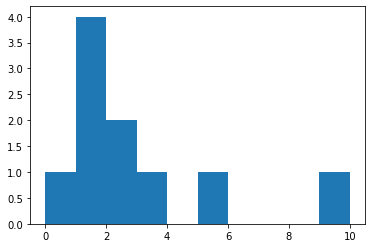

In [14]:
plt.hist(X[1])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <a list of 10 Patch objects>)

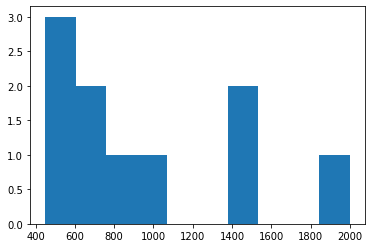

In [15]:
plt.hist(X[2])

In [16]:
X1_mean = X[1].mean()
X1_mean

2.6

In [17]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [0]:
X_st = X.copy().astype(np.float64)

In [19]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

(array([1., 4., 2., 1., 1., 0., 0., 0., 0., 1.]),
 array([-0.92857143, -0.57142857, -0.21428571,  0.14285714,  0.5       ,
         0.85714286,  1.21428571,  1.57142857,  1.92857143,  2.28571429,
         2.64285714]),
 <a list of 10 Patch objects>)

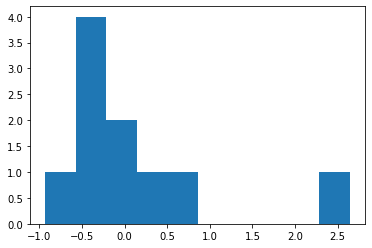

In [20]:
plt.hist(X_st[1])

In [0]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
X_st[2] = calc_std_feat(X[2])

In [23]:
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [24]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [0]:
# SGD

In [0]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [0]:
def eval_model(X, y, iterations, alpha=1e-4):
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [28]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.90941535  4.97619537  3.71502824  2.91055387] 98.93183091028726
200 [56.40660199  5.15350099  3.34404342  3.14295405] 41.311854875571136
300 [57.268256    5.29751945  3.02572523  3.32186608] 40.14745504288608
400 [57.38252817  5.42164565  2.76047406  3.46672342] 40.0223561275338
500 [57.39768289  5.52823344  2.53942084  3.58428553] 39.94758661086509
600 [57.39969271  5.61945353  2.35516473  3.67989256] 39.8958848998892
700 [57.39995925  5.6972962   2.20155292  3.75779743] 39.859962849031284
800 [57.3999946   5.76355746  2.07346811  3.821396  ] 39.834985408270356
900 [57.39999928  5.81983809  1.96665259  3.87340677] 39.817608563829474
1000 [57.3999999   5.86755098  1.87756265  3.91601149] 39.80551410715642


array([57.3999999 ,  5.86755098,  1.87756265,  3.91601149])

In [0]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  n_batch = n // qty_in_batch
  if n % qty_in_batch != 0:
    n_batch += 1
  for i in range(1, iterations+1):
    for b in range(n_batch):
      start_ = qty_in_batch*b
      end_ = qty_in_batch*(b+1)
      
      # print(b, n_batch, start_, end_)
      
      X_tmp = X[:, start_ : end_]
      y_tmp = y[start_ : end_]
      y_pred_tmp = np.dot(W, X_tmp)
      err = calc_mse(y_tmp, y_pred_tmp)
      W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [30]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

500 [57.3957835   5.75989995  1.49305848  4.439241  ] 37.561686622412395
1000 [57.39788989  6.03832367  1.45765691  4.19446072] 38.15443084704516
1500 [57.39781997  6.11308485  1.43753135  4.13952513] 38.27124632703895
2000 [57.39779931  6.13412735  1.42796387  4.12802643] 38.28642026436893
2500 [57.39779281  6.14040584  1.42374121  4.12598483] 38.28456090760517
3000 [57.39779064  6.14240388  1.42194509  4.12579449] 38.281845887305984
3500 [57.39778986  6.14308097  1.42119621  4.12587239] 38.280266806825054
4000 [57.39778958  6.1433232   1.42088747  4.12594172] 38.279509960260945
4500 [57.39778947  6.14341358  1.42076101  4.12597902] 38.279174635390554
5000 [57.39778943  6.14344833  1.42070942  4.12599638] 38.27903171555537


array([57.39778943,  6.14344833,  1.42070942,  4.12599638])

In [0]:
# L1 регуляризация

In [0]:
#f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [0]:
# L2 регуляризация

In [0]:
#f(x, W) + (lambda_/2) * np.sum(W**2)
#df/dw1 = d(w1**2 + w2**2 + w3**2) / dw1 = 2*w1 + 0 + 0 = 2*w1
#f'(x, W) + lambda_ * np.sum(W)


In [0]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    #if i % (iterations / 10) == 0:
      #print(i, W, err)
  return W

In [35]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [0]:
def eval_model_reg2_plot(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    #for k in  range (4):
    plt.plot(W[0])
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

5 [5.9639232  0.68832844 1.4280269  2.29794545] 2850.1918997994508
10 [10.90582194  1.31821367  2.00993692  2.87764238] 2322.777023913738
15 [15.3728842   1.80005322  2.44264521  3.31056597] 1897.7344397474146
20 [19.41073407  2.1704481   2.76317604  3.63315228] 1553.7756238207191
25 [23.06061193  2.45692804  2.99937596  3.87280492] 1274.6188725885277
30 [26.35979559  2.68019998  3.17218876  4.05013398] 1047.5902478856601
35 [29.3419811   2.85583932  3.29736647  4.18063999] 862.6902865996701
40 [32.03762685  2.99556183  3.38675628  4.27598044] 711.9501400248078
45 [34.47426468  3.10818037  3.44926846  4.34492243] 588.9726445457896
50 [36.67678104  3.20032444  3.49160433  4.39405908] 488.59533092414614


array([36.67678104,  3.20032444,  3.49160433,  4.39405908])

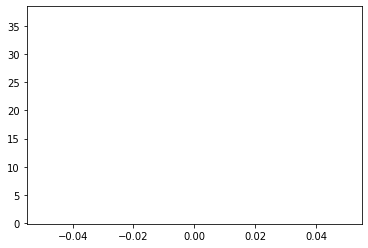

In [37]:
eval_model_reg2_plot(X_st, y, iterations=50, alpha=1e-2, lambda_=1e-4)

In [38]:
X[1,:]

array([ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2])

In [39]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [0]:
#C = 1/lambda_

In [117]:
l_arr=np.arange(0.15,0.2,1e-3)
len(l_arr)


51

In [92]:
len(w_arr)

8

In [118]:
w_arr = [eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l_arr[len(l_arr)-1])]

for l in range(len(l_arr)-1):
  w_arr=np.append(w_arr, [eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l_arr[l])],axis=0)

w_arr

array([[52.18181818,  4.87503598,  2.61183202,  3.75830509],
       [53.39534884,  5.0668987 ,  2.46618896,  3.81301226],
       [53.37052534,  5.06261603,  2.4696304 ,  3.81181124],
       [53.34572491,  5.05835399,  2.4730471 ,  3.81061534],
       [53.32094752,  5.05411242,  2.47643928,  3.80942452],
       [53.29619313,  5.04989113,  2.47980716,  3.8082387 ],
       [53.27146172,  5.04568997,  2.48315096,  3.80705785],
       [53.24675325,  5.04150876,  2.48647091,  3.8058819 ],
       [53.22206769,  5.03734734,  2.48976721,  3.80471081],
       [53.197405  ,  5.03320553,  2.49304009,  3.80354452],
       [53.17276517,  5.02908319,  2.49628975,  3.80238298],
       [53.14814815,  5.02498014,  2.49951639,  3.80122614],
       [53.12355391,  5.02089623,  2.50272024,  3.80007396],
       [53.09898242,  5.0168313 ,  2.50590148,  3.79892638],
       [53.07443366,  5.0127852 ,  2.50906032,  3.79778335],
       [53.04990758,  5.00875777,  2.51219696,  3.79664483],
       [53.02540416,  5.

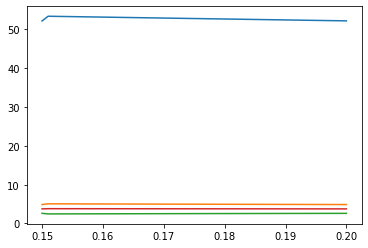

In [119]:
for i in range(len(w_arr[0,:])) :
  #plt.plot(l_arr,w_arr[:,i])
  plt.plot(l_arr,w_arr[:,i])
 